In [ ]:
%pip install seaborn
# %pip install graphviz


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Make sure the csv is in the same directory
df = pd.read_csv('heart_2020_cleaned.csv')
df.dropna()
pd.set_option('display.max_columns', None)

In [3]:
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [4]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [5]:
# ages = pd.get_dummies(df['AgeCategory'])
# diabetes = pd.get_dummies(df['Diabetic'])
# races = pd.get_dummies(df['Race'])
# healths = pd.get_dummies(df['GenHealth'])
categorical_columns = ['AgeCategory', 'Diabetic', 'Race', 'GenHealth']
for cat in categorical_columns:
    dummy = pd.get_dummies(df[cat])
    df = df.join(dummy)
    
df.rename(columns = {'No':'Diabetic_No', 'Yes': 'Diabetic_Yes', 'Yes (during pregnancy)': 'Diabetic_During_Pregnancy', 'No, borderline diabetes': 'Borderline_Diabetes'}, inplace = True)
df.rename(columns = {'Excellent': 'Excellent_Health', 'Fair': 'Fair_Health', 'Good': 'Good_Health', 'Poor': 'Poor_Health', 'Very good': 'Very_Good_Health'}, inplace = True)
for cat in categorical_columns:
    df.drop([cat], axis=1, inplace=True)

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,5.0,Yes,No,Yes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,Yes,7.0,No,No,No,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,8.0,Yes,No,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,No,6.0,No,No,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,Yes,8.0,No,No,No,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [7]:
# Only columns that have yes/no values
yes_no_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

# Mapping for yes/no values
yes_no_map = {'Yes': 1, 'No': 0}
male_female_map = {'Male': 1, 'Female': 0}

# Converting that have yes/no values
for cat in yes_no_columns:
    df[cat] = df[cat].map(yes_no_map)
df['Sex'] = df['Sex'].map(male_female_map)

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [9]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older', 'Diabetic_No', 'Borderline_Diabetes', 'Diabetic_Yes', 'Diabetic_During_Pregnancy', 'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'Excellent_Health', 'Fair_Health', 'Good_Health', 'Poor_Health', 'Very_Good_Health']


In [ ]:
df.corr()

([<matplotlib.patches.Wedge at 0x19802207e50>,
 [Text(1.0604683173239722, 0.29224467138352267, 'Has Heart Disease'),
  Text(-1.0604683446858885, -0.2922445720953119, 'Does Not Have Heart Disease')])

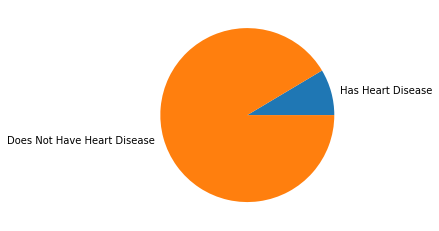

In [11]:
row_heart_yes = df.loc[df['HeartDisease'] == 1]
row_heart_no = df.loc[df['HeartDisease'] == 0]
row_kidney_yes = df.loc[df['KidneyDisease'] == 1]
row_kidney_no = df.loc[df['KidneyDisease'] == 0]
row_diabetes_yes = df['Diabetic_Yes']
row_diabetes_no = df['Diabetic_No']
heart_labels = ['Has Heart Disease', 'Does Not Have Heart Disease']
plt.pie([len(row_heart_yes), len(row_heart_no)], labels = heart_labels)

([<matplotlib.patches.Wedge at 0x1afeed0c6a0>,
 [Text(1.0926438384423367, 0.12700174138175013, 'Has Kidney Disease'),
  Text(-1.0926438458740606, -0.12700167744381283, 'Does Not Have Kidney Disease')])

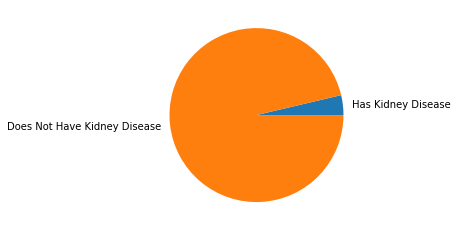

In [14]:
kidney_labels = ['Has Kidney Disease', 'Does Not Have Kidney Disease']
plt.pie([len(row_kidney_yes), len(row_kidney_no)], labels = kidney_labels)

([<matplotlib.patches.Wedge at 0x1afeed534c0>,
 [Text(1.0075622294357416, 0.44138232159260565, 'Has Diabetes'),
  Text(-1.0075622294357416, -0.4413823215926054, 'Does Not Have Diabetes')])

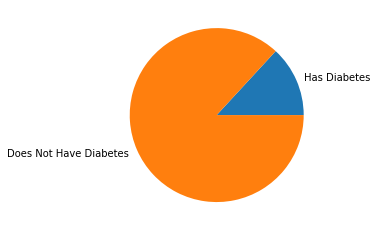

In [15]:
diabetes_labels = ['Has Diabetes', 'Does Not Have Diabetes']
plt.pie([sum(row_diabetes_yes), sum(row_diabetes_no)], labels = diabetes_labels)

In [57]:
sample_size_heart = 20000

sample_heart_yes = row_heart_yes.sample(sample_size_heart)
sample_heart_no = row_heart_no.sample(sample_size_heart)
x_train_yes, x_test_yes, y_train_yes, y_test_yes = train_test_split(sample_heart_yes, sample_heart_yes["HeartDisease"], train_size=0.5, test_size=0.5)
x_train_no, x_test_no, y_train_no, y_test_no = train_test_split(sample_heart_no, sample_heart_no["HeartDisease"], train_size=0.5, test_size=0.5)

df_test_sample = pd.concat([x_test_yes, x_test_no])

# df_sample = pd.concat([sample_heart_yes, sample_heart_no])
df_sample = pd.concat([x_train_yes, x_train_no])
df_sample.corr()

target = 'HeartDisease'

heart_disease_pearson = df_sample.corr('pearson')[[target]].sort_values(by=target, ascending=False)
heart_disease_spearman = df_sample.corr('spearman')[[target]].sort_values(by=target, ascending=False)

print(heart_disease_pearson[1:10])
print(heart_disease_spearman[1:10])

                HeartDisease
DiffWalking         0.289628
Diabetic_Yes        0.271892
PhysicalHealth      0.245274
Stroke              0.230596
Poor_Health         0.214527
Fair_Health         0.207083
80 or older         0.190139
Smoking             0.183436
KidneyDisease       0.182800
                HeartDisease
DiffWalking         0.289628
Diabetic_Yes        0.271892
PhysicalHealth      0.234251
Stroke              0.230596
Poor_Health         0.214527
Fair_Health         0.207083
80 or older         0.190139
Smoking             0.183436
KidneyDisease       0.182800


In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df_sample.corr(), annot=True)

In [ ]:
# fig, ax = plt.subplots(1,2, figsize=(20, 8))
# target = 'HeartDisease'

# heart_disease_pearson = df.corr('pearson')[[target]].sort_values(by=target, ascending=False)
# heart_disease_spearman = df.corr('spearman')[[target]].sort_values(by=target, ascending=False)

# sns.heatmap(heart_disease_pearson, ax=ax[0], annot=True)
# sns.heatmap(heart_disease_spearman, ax=ax[1], annot=True)

# ax[0].set_xlabel("Pearson")
# ax[1].set_xlabel("Spearman")

In [ ]:
keepThese = ['DiffWalking', 'PhysicalHealth', 'Diabetic_Yes', 'Stroke', 'Poor_Health']
#dropThese = ['HeartDisease','Sex','AgeCategory','Race','GenHealth','HeartDisease_val','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

#X = df_sample.drop(columns=dropThese)
X = df_sample[keepThese]
Y = df_sample['HeartDisease']

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=40, feature_names=keepThese, class_names=['No HD', 'Yes HD'])


In [59]:
# Test decision tree accuracy
# testSize = 10000
# testData = df.sample(testSize)
predictedLabel = clf.predict(df_test_sample[keepThese])
accuracy = sum(predictedLabel == df_test_sample["HeartDisease"]) / sample_size_heart
accuracy

0.69475

In [81]:
# ada_classifier = AdaBoostClassifier(n_estimators=100)
# # scores = cross_val_score(ada_classifier, X, Y, cv=5)
# ada_classifier.fit(X, Y)
# predicted_label_ensemble = ada_classifier.predict(df_test_sample[keepThese])
# accuracy_ensamble = sum(predicted_label_ensemble == df_test_sample["HeartDisease"]) / sample_size_heart
# accuracy_ensamble

rf_classifier = RandomForestClassifier(max_depth=5)
rf_classifier.fit(X, Y)
predicted_label_ensemble = rf_classifier.predict(df_test_sample[keepThese])
accuracy_ensamble = sum(predicted_label_ensemble == df_test_sample["HeartDisease"]) / sample_size_heart
accuracy_ensamble


0.6979

In [20]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                   feature_names=keepThese,  
#                    class_names=["No HD", "Yes HD"],  
#                      filled=True, rounded=True,  
#                     special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph